<a href="https://colab.research.google.com/github/kylemath/eeg-notebooks/blob/master/notebooks/CueingBehaviourAnalysis_Colab_Winter2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CueingBehaviourAnalysis_Colab_Winter2019

The cueing task can ellicit a number of reliable changes. A central cue indicates the location of an upcoming target onset. Here the task can be changed to be perfectly predictive, or have some level of cue validity. Task is to indicate the orientation of a spatial grating on the target, up for vertical, right for horizontal.

ERP - Validly cued targets ellict larger ERP's than invalidly cued targets

Response ERPs - Validly cued targets are more quickly identified and better identified

Oscillations - Alpha power lateralizes after a spatial cue onset preceeding the upcoming onset of a target. Alpha power becomes smaller contraleral to the target side, and larger ipsilateral with the target.

In [1]:
!git clone https://github.com/kylemath/eeg-notebooks --recurse-submodules
%cd eeg-notebooks/data/visual/cueing/

Cloning into 'eeg-notebooks'...
remote: Enumerating objects: 66, done.
remote: Counting objects: 100% (66/66), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 2179 (delta 35), reused 33 (delta 14), pack-reused 2113
Receiving objects: 100% (2179/2179), 163.63 MiB | 18.53 MiB/s, done.
Resolving deltas: 100% (929/929), done.
Checking out files: 100% (641/641), done.
/content/eeg-notebooks/data/visual/cueing


In [0]:
import scipy.io as sio 
import os
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

# Analyze .mat behavioural data for Accuracy and RT


Load in subjects

In [0]:
# # Fall 2018
subs = [101, 102, 103, 104, 106, 108, 109, 110, 111, 112,
        202, 203, 204, 205, 207, 208, 209, 210, 211, 
        301, 302, 303, 304, 305, 306, 307, 308, 309]

# 105 - no trials in one condition

# # Winter 2019
# subs = [1101, 1102, 1103, 1104, 1105, 1106, 1108, 1109, 1110,
#         1202, 1203, 1205, 1206, 1209, 1210, 1211, 1215,
#         1301, 1302, 1313, 
#         1401, 1402, 1403, 1404, 1405,  1408, 1410, 1411, 1412, 1413, 1413, 1414, 1415, 1416]

# # 1107 - no csv session 1
# # 1201 - no csv session 1
# # 1304 - Muse 2
# # 1308 - Muse 2
# # 1311 - Muse 2
# # 1314 - Muse 2
# # 1407 - only session1

# Both 

# Fall 2018
# subs = [101, 102, 103, 104, 106, 108, 109, 110, 111, 112,
#         202, 203, 204, 205, 207, 208, 209, 210, 211, 
#         301, 302, 303, 304, 305, 306, 307, 308, 309,
#         1101, 1102, 1103, 1104, 1105, 1106, 1108, 1109, 1110,
#         1202, 1203, 1205, 1206, 1209, 1210, 1211, 1215,
#         1301, 1302, 1313, 
#         1401, 1402, 1403, 1404, 1405,  1408, 1410, 1411, 1412, 1413, 1413, 1414, 1415, 1416]


Set some settings

In [0]:
# basic numbers
n_subs = len(subs)
n_sesh = 2
conditions = ['valid','invalid']
n_cond = len(conditions)

# cutoff trials that are too slow or fast
rt_toofast = 250
rt_tooslow = 1500

#creates arrays to save output
count_rt = np.zeros((n_subs, n_sesh, n_cond))
median_rt = np.zeros((n_subs, n_sesh, n_cond))
prop_accu = np.zeros((n_subs, n_sesh, n_cond))

Single Subject example

In [31]:
#select single subject
sub = subs[0]
print('Subject - ' + str(sub))

#just one session 
sesh = 1

#load file
path =  './subject' + str(sub) + '/session' + str(sesh) + '/'
file =  [x for x in os.listdir(path) if x.endswith('.mat')][0]
output_dict = sio.loadmat(path + file)
print(path + file)

#pull out important info
output = output_dict['output']
accuracy = output[:,6]
rt = output[:,7]
validity = output[:,3]
print(accuracy,rt,validity)

# median rt on each condition	
print('')
print(rt)
print(rt[validity == 0])
print(rt[(validity == 0) & (rt <= rt_tooslow)])

validRT  	=  np.nanmedian(rt[ (validity == 1) &
                              (rt >= rt_toofast) &
                              (rt <= rt_tooslow)])

print('Valid RT = ' + str(validRT) + ' ms')

InvalidRT =  np.nanmedian(rt[ (validity == 0) &
                              (rt >= rt_toofast) &
                              (rt <= rt_tooslow)]) 

print('Invalid RT = ' + str(InvalidRT) + ' ms')

Subject - 101
./subject101/session1/subject101_session1_behOutput_2018-11-20-16.49.27.mat
[1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1.] [267.486316 368.197394 359.114961 443.325697 400.459867 338.903969
 335.497442 344.23244  356.226233 413.148977 379.451902 316.690498
 354.088677 373.602933 309.049937 434.614427 334.242317 347.36567
 559.56115  322.360502 342.381079 296.946102 363.025883 466.486784
 405.095436 319.433791 396.683878 383.602173 340.87966  354.004383
 376.375779 426.027515 354.717818 369.7502   422.330031 419.2258
 386.381543 359.174393 349.714812 356.469947 313.615834 322.796616
 441.424417 365.827293 374.314179 399.225807 419.822978 376.170782
 408.44391  410.311049 367.621084 317.141214 397.751161 356.786541
 358.868281 510.4043   482.490751 401.646274 389.68048  401.859856
 343.478114 402.491

Loop through subjects

In [25]:
# loop through subjects
for isub, sub in enumerate(subs):
	print('Subject - ' + str(sub))
	for sesh in range(n_sesh):
		# get the path and file name and load data
		path =  './subject' + str(sub) + '/session' + str(sesh+1) + '/'
		file =  [x for x in os.listdir(path) if x.endswith('.mat')][0]
		output_dict = sio.loadmat(path + file)

		# pull out important stuff
		output = output_dict['output']
		accuracy = output[:,6]
		rt = output[:,7]
		validity = output[:,3]
  
		# median rt on each condition	
		median_rt[isub,sesh,:] 	= [  np.nanmedian(rt[ (validity == 1) &
													 	                      (rt >= rt_toofast) &
													 	                      (rt <= rt_tooslow)]),
									               np.nanmedian(rt[ (validity == 0) &
														                      (rt >= rt_toofast) &
														                      (rt <= rt_tooslow)]) ]
    
    
		# proportion accurate (number accurate / count)							
		prop_accu[isub,sesh,:]  = [	np.sum(accuracy[(validity == 1) &
														                    (rt >= rt_toofast) &
														                    (rt <= rt_tooslow)]) / 
									np.sum((validity == 1) & (rt >= rt_toofast) & (rt <= rt_tooslow)),
              									np.sum(accuracy[(validity == 0) &
														                    (rt >= rt_toofast) &
														                    (rt <= rt_tooslow)]) /
									np.sum((validity == 0) & (rt >= rt_toofast) & (rt <= rt_tooslow)) ]
	


Subject - 101
Subject - 102
Subject - 103
Subject - 104
Subject - 106
Subject - 108
Subject - 109
Subject - 110
Subject - 111
Subject - 112
Subject - 202
Subject - 203
Subject - 204
Subject - 205
Subject - 207
Subject - 208
Subject - 209
Subject - 210
Subject - 211
Subject - 301
Subject - 302
Subject - 303
Subject - 304
Subject - 305
Subject - 306
Subject - 307
Subject - 308
Subject - 309


Average over sessions and print data

In [32]:
    # Summary stats and collapse sessions
Out_median_RT = np.squeeze(np.nanmean(median_rt,axis=1))
Out_prop_accu = np.squeeze(np.nanmean(prop_accu,axis=1))

print('Median RT')
print(Out_median_RT)
print('Proportion Accurate')
print(Out_prop_accu)

Median RT
[[361.7079635  364.45366275]
 [547.10713075 611.45526175]
 [600.073256   587.019756  ]
 [528.29669975 537.8690605 ]
 [419.24263125 439.1580675 ]
 [456.3330375  631.1320265 ]
 [446.95026625 556.038382  ]
 [484.0763345  478.4887    ]
 [443.5412585  472.331497  ]
 [436.66653125 501.3115865 ]
 [495.63977675 587.358365  ]
 [520.97468575 973.144689  ]
 [395.5098235  370.232933  ]
 [489.59985525 560.08098575]
 [455.6651645  500.22833625]
 [662.9326765  643.0934405 ]
 [488.56224425 474.7125945 ]
 [482.1316255  543.0173155 ]
 [713.4103845  894.0804795 ]
 [485.48053725 533.6649235 ]
 [464.47033775 517.368321  ]
 [488.45884825 500.39610975]
 [527.5814465  533.4898155 ]
 [477.23867575 446.72875575]
 [484.94210575 578.6717025 ]
 [681.7458885  804.780758  ]
 [419.736862   485.569911  ]
 [435.42846425 437.12191   ]]
Proportion Accurate
[[0.98305085 0.96428571]
 [1.         1.        ]
 [0.91680961 0.88974359]
 [0.98809524 1.        ]
 [0.9822995  1.        ]
 [0.95403439 0.6       ]
 [0.923

Plot barplot of results

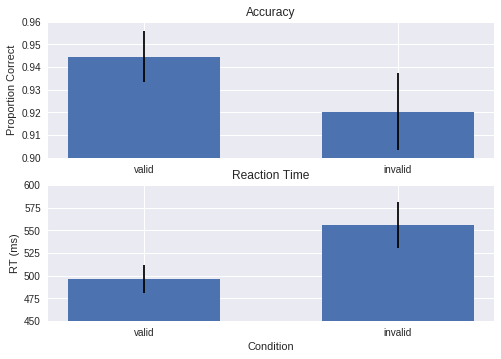

In [33]:
# bar plot results
plt.figure()
# Accuracy
ax = plt.subplot(211)
plt.bar([0,1], np.nanmean(Out_prop_accu,axis=0), 0.6, yerr = np.nanstd(Out_prop_accu,axis=0)/np.sqrt(n_subs))
plt.ylim(.9,.96)
plt.title('Accuracy')
plt.ylabel('Proportion Correct')
ax.set_xticks([0,1])
ax.set_xticklabels(conditions)
# RT
ax = plt.subplot(212)
plt.bar([0,1], np.nanmean(Out_median_RT,axis=0), 0.6, yerr = np.nanstd(Out_median_RT,axis=0)/np.sqrt(n_subs))
plt.ylim(450,600)
plt.title('Reaction Time')
plt.ylabel('RT (ms)')
plt.xlabel('Condition')
ax.set_xticks([0,1])
ax.set_xticklabels(conditions)
plt.show()


Output spreadsheet



In [34]:
## CSV output
column_dict = {'Participant':subs,
				'AccValid':Out_prop_accu[:,0],
				'AccInvalid':Out_prop_accu[:,1],
				'RTValid':Out_median_RT[:,0],
				'RTInvalid':Out_median_RT[:,1] }
df = pd.DataFrame(column_dict)
print(df)
df.to_csv('375CueingBehPy.csv',index=False)


    AccInvalid  AccValid  Participant   RTInvalid     RTValid
0     0.964286  0.983051          101  364.453663  361.707963
1     1.000000  1.000000          102  611.455262  547.107131
2     0.889744  0.916810          103  587.019756  600.073256
3     1.000000  0.988095          104  537.869061  528.296700
4     1.000000  0.982299          106  439.158067  419.242631
5     0.600000  0.954034          108  631.132027  456.333038
6     0.977273  0.923469          109  556.038382  446.950266
7     0.970588  0.990196          110  478.488700  484.076334
8     1.000000  0.973960          111  472.331497  443.541259
9     0.833333  0.682759          112  501.311586  436.666531
10    0.897321  0.899140          202  587.358365  495.639777
11    0.733333  0.920807          203  973.144689  520.974686
12    0.916667  0.947160          204  370.232933  395.509823
13    1.000000  0.957555          205  560.080986  489.599855
14    0.949495  0.959592          207  500.228336  455.665165
15    0.